In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Convert DataFrame to NumPy array and reshape images
X = mnist.data.values.reshape(-1, 28, 28) / 255.0  # Reshape and normalize pixel values
y = mnist.target.astype(int)  # by using int instead of np.int


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


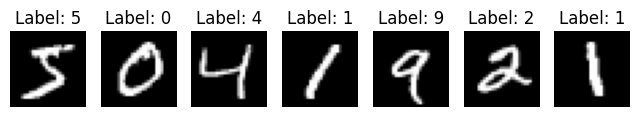

In [5]:
# Display a few sample images and corresponding labels
plt.figure(figsize=(8, 4))
for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()


In [6]:
# Vectorize data
X = X.reshape(-1, 28*28)


In [7]:
# Data splitting
splits = [(0.8, 0.2), (0.5, 0.5), (0.2, 0.8), (0.01, 0.99)]

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)


In [9]:

    # Preprocessing step: Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model selection and training
    models = {
        'Support Vector Machine': SVC(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)  # Train model using standardized data
        y_pred = model.predict(X_test_scaled)

        # Model evaluation
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)

        print(f"Split: {train_size}:{test_size}, Model: {name}")
        print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")
        print("Confusion Matrix:")
        print(confusion_mat)
        print("\n")


Split: 0.01:0.99, Model: Support Vector Machine
Accuracy: 0.836002886002886, Precision: 0.8535863812789046, Recall: 0.836002886002886, F1-score: 0.8393295033209686
Confusion Matrix:
[[6288    2  188   24   17   66  178    3   60   13]
 [   0 7565   69   38    4   26   28    6   50    9]
 [  58  131 6015  193  106    8   98   63  235   11]
 [  24  107  630 5585   18  183   34   82  337   75]
 [   4   37  417    1 5670   90   56   14   31  445]
 [  56   56  600  279   67 4821  191    8  123   45]
 [  79   33  578    2   43   33 6017    0   14    1]
 [  23  106 1404   11  116   16   17 5095   74  365]
 [  41  205  346  375   42  281   95   16 5270   76]
 [  42   54  442   73  293   35    4  245   91 5609]]


Split: 0.01:0.99, Model: Logistic Regression
Accuracy: 0.8456565656565657, Precision: 0.8458526213174833, Recall: 0.8456565656565657, F1-score: 0.8447519072477752
Confusion Matrix:
[[6363    1   68   34   20   84  205    5   36   23]
 [   1 7596   37   24   15   36   27    9   30   20

The first block of code,  of code imports all the necessary libraries for the task at hand and include fetch_openml from sklearn.datasets to load the MNIST dataset

The scond block of code, the MNIST dataset is loaded using fetch_openml. The images are reshaped to a 28x28 grid and normalized by dividing by 255 to scale pixel values between 0 and 1. The labels are converted to integers

The third block of code visualizes seven sample images from the dataset along with their corresponding labels.

The forth block of code, the images are flattened into 1D arrays for training machine learning models

The fifth block of code, splits the data into training and testing sets using train_test_split. It iterates over different combinations of train-test splits defined in the splits list.

The last block of code, contain model training, evaluation, and printing of evaluation metrics for each model and split combination and also standardize the features, train multiple models on the training data, and evaluate each model's performance on the corresponding test data for each split configuration.